Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IndexError: index 2 is out of bounds for axis 0 with size 2

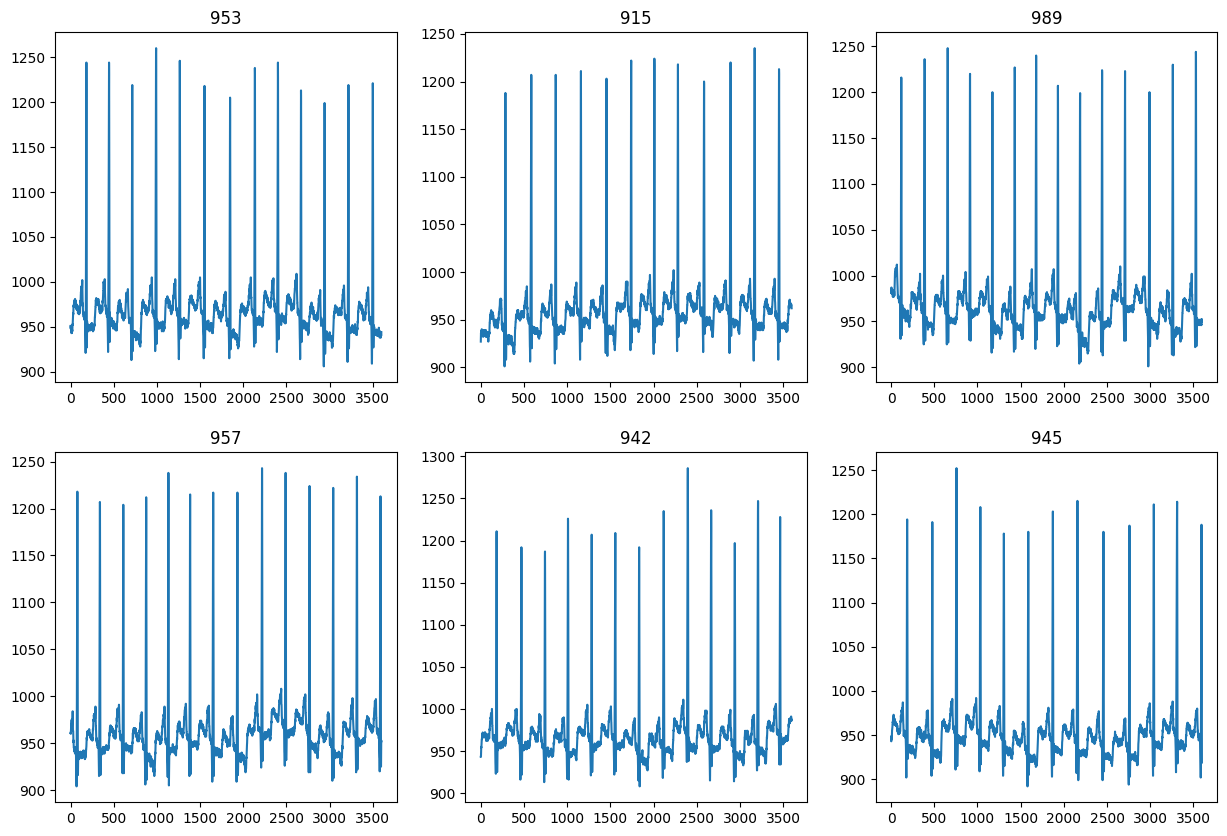

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew
from google.colab import drive

# Langkah 1: Mengakses dataset dari Google Drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Colab Notebooks/data0-SZL.csv'

# Langkah 2: Membaca dataset dan menghitung statistik
dataset = pd.read_csv(file_path)

def compute_statistics(column):
    mean = np.mean(column)
    std_dev = np.std(column)
    skewness = skew(column)
    median = np.median(column)
    energy = np.sum(column ** 2)
    minimum = np.min(column)
    maximum = np.max(column)

    return mean, std_dev, skewness, median, energy, minimum, maximum

statistics = {}
for col in dataset.columns:
    statistics[col] = compute_statistics(dataset[col])

# Langkah 3: Plot sinyal
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, (col, stats) in enumerate(statistics.items()):
    ax = axes[i//3, i%3]
    ax.plot(dataset.index, dataset[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

# Langkah 4: Scatterplot untuk rata-rata dan standar deviasi
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(0, 30, 10):
    subset = statistics[f'Column{i+1}':f'Column{i+10}']
    mean_values = [stats[0] for stats in subset.values()]
    std_dev_values = [stats[1] for stats in subset.values()]
    ax.scatter(mean_values, std_dev_values, label=f'Columns {i+1}-{i+10}')

ax.set_xlabel('Mean')
ax.set_ylabel('Standard Deviation')
ax.legend()
plt.title('Scatter Plot of Mean vs Standard Deviation')
plt.show()

# Langkah 5: Scatterplot untuk skewness dan median
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(0, 30, 10):
    subset = statistics[f'Column{i+1}':f'Column{i+10}']
    skewness_values = [stats[2] for stats in subset.values()]
    median_values = [stats[3] for stats in subset.values()]
    ax.scatter(skewness_values, median_values, label=f'Columns {i+1}-{i+10}')

ax.set_xlabel('Skewness')
ax.set_ylabel('Median')
ax.legend()
plt.title('Scatter Plot of Skewness vs Median')
plt.show()